<a href="https://colab.research.google.com/github/OlgaTihanovich/DataScience/blob/main/HW4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

#загрузка файла
df=pd.read_csv('/content/Coffe_sales.csv')
df['Time_day']=df['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Night': 2})

# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

print(df.select_dtypes(include='object').describe())

#расчет количества уникальных значений
unique_values=df.nunique()
print(f"Количество уникальных значений\n {unique_values}")

#подсчитаем дубликаты
total_duplicates = df.duplicated().sum()
print(f"Количество полностью совпадающих строк: {total_duplicates}")

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  Time_day  
0            5          3  2024-03-01  10:15:50.520000         0  
1            5          3  2024-03-01  12:19:22.539000         1  
2            5          3  2024-03-01  12:20:18.089000         1  
3            5          3  2024-03-01  13:46:33.006000         1  
4            5          3  2024-03-01  13:48:14.626000         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 12 columns):
 #  

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type"], axis=1)
X = df.drop(["coffee_name","Date", "Time", "cash_type","Time_of_Day","Weekday","Month_name"], axis=1)

#Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Кодируем категориальные признаки
X = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение моделей
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Оценка моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_log_reg, accuracy_rf, report_log_reg, report_rf)

0.568075117370892 0.6338028169014085               precision    recall  f1-score   support

           0       0.70      0.72      0.71       173
           1       0.69      0.99      0.81       241
           2       0.27      0.11      0.16       146
           3       0.00      0.00      0.00        70
           4       0.44      0.25      0.32        75
           5       1.00      0.68      0.81        38
           6       0.00      0.00      0.00        82
           7       0.44      0.75      0.55       240

    accuracy                           0.57      1065
   macro avg       0.44      0.44      0.42      1065
weighted avg       0.47      0.57      0.50      1065
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.99      0.99      0.99       241
           2       0.35      0.38      0.36       146
           3       0.30      0.24      0.27        70
           4       0.47      0.47      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Классификатор CatBoost
!pip install catboost
# Импортируем необходимые библиотеки
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type", "hour_of_day"], axis=1)
X = df.drop(["coffee_name"], axis=1)

#Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Кодируем категориальные признаки
X = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.3, random_state=42)

# Создание модели CatBoostClassifier
clf = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='MultiClass', l2_leaf_reg=5, random_state=42, verbose=100)

# Обучение модели на обучающем наборе данных
clf.fit(X_train, y_train, cat_features=cat_features)

# Предсказание классов на тестовом наборе данных
y_pred = clf.predict(X_test)

# Генерация отчета о классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=df["coffee_name"].unique())

# Вывод отчета
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(report)

0:	learn: 1.9066887	total: 314ms	remaining: 2m 36s
100:	learn: 0.7575940	total: 7.42s	remaining: 29.3s
200:	learn: 0.6212880	total: 14.7s	remaining: 21.9s
300:	learn: 0.5401056	total: 21.5s	remaining: 14.2s
400:	learn: 0.4834041	total: 29s	remaining: 7.17s
499:	learn: 0.4349787	total: 36.4s	remaining: 0us
Accuracy: 0.64
Classification Report:
                     precision    recall  f1-score   support

              Latte       0.76      0.79      0.77       173
      Hot Chocolate       0.99      0.99      0.99       241
          Americano       0.42      0.34      0.37       146
Americano with Milk       0.41      0.13      0.20        70
              Cocoa       0.50      0.48      0.49        75
            Cortado       1.00      0.84      0.91        38
           Espresso       0.38      0.12      0.19        82
         Cappuccino       0.47      0.73      0.57       240

           accuracy                           0.64      1065
          macro avg       0.62      0.55   

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       173
           1       0.99      1.00      0.99       241
           2       0.35      0.38      0.37       146
           3       0.27      0.30      0.28        70
           4       0.52      0.56      0.54        75
           5       1.00      0.97      0.99        38
           6       0.31      0.24      0.27        82
           7       0.50      0.50      0.50       240

    accuracy                           0.63      1065
   macro avg       0.59      0.59      0.59      1065
weighted avg       0.63      0.63      0.63      1065

Confusion Matrix:
[[133   1   0   0  39   0   0   0]
 [  0 241   0   0   0   0   0   0]
 [  0   0  55  15   0   0  14  62]
 [  0   0  18  21   0   0   6  25]
 [ 32   1   0   0  42   0   0   0]
 [  1   0   0   0   0  37   0   0]
 [  0   0  16  14   0   0  20  32]
 [  0   1  66  29   0   0  25 119]]


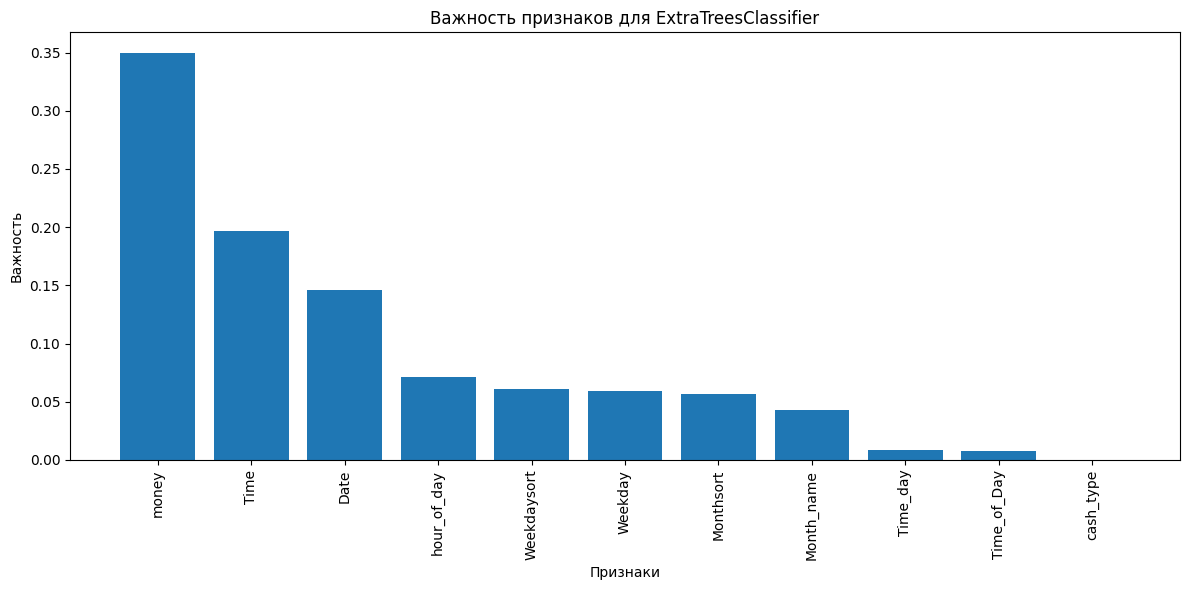

In [29]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Целевая переменная
#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type", "hour_of_day"], axis=1)
X = df.drop(["coffee_name"], axis=1)

# Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Преобразование категориальных признаков в числовые через LabelEncoder
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Создание и обучение классификатора
clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Прогноз и метрики
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(cm)

# Визуализация важности признаков
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков для ExtraTreesClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Используем реальные имена признаков
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

In [30]:
# lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type", "hour_of_day"], axis=1)
X = df.drop(["coffee_name"], axis=1)

# Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Приводим категориальные признаки к типу category
for col in cat_features:
    X[col] = X[col].astype("category")

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Создание и обучение классификатора с использованием GridSearchCV для подбора гиперпараметров
#clf = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
#clf.fit(X_train, y_train)

param_grid = {
    'num_leaves': [10, 31, 50],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200,500]
}

# Инициализация Classifier
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train, y_train)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Точность на обучающей выборке для проверки переобучения
y_train_pred = best_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 2837, number of used features: 10
[LightGBM] [Info] Start training from score -1.839035
[LightGBM] [Info] Start training from score -1.478156
[LightGBM] [Info] Start training from score -1.986923
[LightGBM] [Info] Start training from score -2.698229
[LightGBM] [Info] Start training from score -2.512423
[LightGBM] [Info] Start training from score -3.315773
[LightGBM] [Info] Start training from score -2.552340
[LightGBM] [Info] Start training from sc

In [31]:
# Экстремальный градиентный бустинг xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type", "hour_of_day"], axis=1)
X = df.drop(["coffee_name"], axis=1)

# Категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Кодируем категориальные признаки
X = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Модель XGBoost
clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
clf.fit(X_train, y_train)

# Прогноз
y_pred = clf.predict(X_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=y_le.classes_)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(cm)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:45:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.67
Classification Report:
                     precision    recall  f1-score   support

          Americano       0.80      0.80      0.80       169
Americano with Milk       1.00      1.00      1.00       243
         Cappuccino       0.47      0.37      0.41       146
              Cocoa       0.38      0.25      0.30        72
            Cortado       0.60      0.60      0.60        86
           Espresso       1.00      1.00      1.00        39
      Hot Chocolate       0.39      0.36      0.38        83
              Latte       0.48      0.62      0.54       227

           accuracy                           0.67      1065
          macro avg       0.64      0.63      0.63      1065
       weighted avg       0.66      0.67      0.66      1065

Confusion Matrix:
[[135   0   0   0  34   0   0   0]
 [  0 243   0   0   0   0   0   0]
 [  0   0  54  10   0   0   8  74]
 [  0   0   9  18   0   0  10  35]
 [ 34   0   0   0  52   0   0   0]
 [  0   0   0   0   0  39   0   0]

In [33]:
# svm
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#y = df["Time_of_Day"]
y = df["coffee_name"]

# Признаки
#X = df.drop(["Time_of_Day", "Date", "Time", "cash_type", "hour_of_day"], axis=1)
X = df.drop(["coffee_name"], axis=1)

# Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Кодируем категориальные признаки
X = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Создание и обучение модели SVM с полиномиальным ядром
svm_model = SVC(kernel='linear', degree=3, C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Прогнозирование
y_pred = svm_model.predict(X_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       169
           1       0.95      0.95      0.95       243
           2       0.30      0.19      0.23       146
           3       0.12      0.24      0.16        72
           4       0.44      0.21      0.28        86
           5       1.00      0.87      0.93        39
           6       0.00      0.00      0.00        83
           7       0.39      0.51      0.44       227

    accuracy                           0.55      1065
   macro avg       0.48      0.48      0.47      1065
weighted avg       0.53      0.55      0.53      1065

Confusion Matrix:
[[145   1   0   0  23   0   0   0]
 [  3 231   0   0   0   0   0   9]
 [  0   5  28  39   0   0   0  74]
 [  0   1  11  17   0   0   0  43]
 [ 68   0   0   0  18   0   0   0]
 [  5   0   0   0   0  34   0   0]
 [  0   0   9  21   0   0   0  53]
 [  0   5  45  62   0   0   0 115]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
Экстремальный градиентный бустинг xgboost показал лучшую точность 0,67